# Processing the capillary force video
+ date: 2017-05-30
+ tags: soft matter

## Export Frames
Get frame rate information
```sh
videoname=T-L\ _\ 1-50\ tip-tip.avi
ffmpeg -i $videoname 2>&1 |grep -o '[0-9]\+ fps'
```

The output is `30 fps`
```sh
ffmpeg -i $videoname -r 30 output_%04d.png
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from skimage import feature, io
from skimage.restoration import denoise_tv_chambolle

## Noise Reduction and Edge Detection

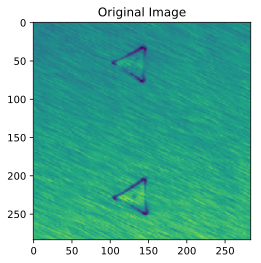

In [2]:
im = io.imread('images/output_0052.png', as_grey=True)
title('Original Image')
imshow(im);

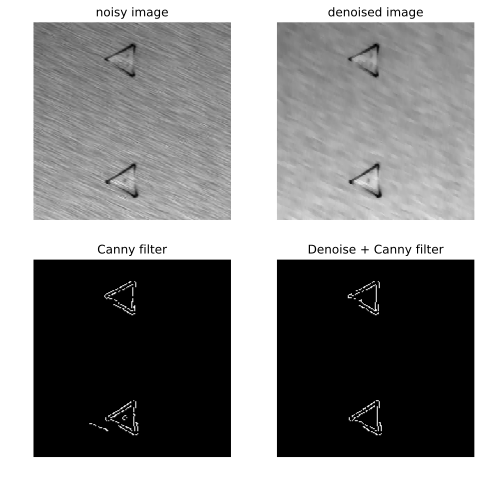

In [3]:
s=[1.5, 1.5]
im2=denoise_tv_chambolle(im, weight=0.05, multichannel=True)
edges2 = feature.canny(im, sigma=s[1])
edges1 = feature.canny(im2, sigma=s[0])

fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].imshow(im, cmap=plt.cm.gray)
ax[0,0].axis('off')
ax[0,0].set_title('noisy image')

ax[0,1].imshow(im2, cmap=plt.cm.gray)
ax[0,1].axis('off')
ax[0,1].set_title('denoised image')

ax[1,0].imshow(edges2, cmap=plt.cm.gray)
ax[1,0].axis('off')
ax[1,0].set_title('Canny filter')

ax[1,1].imshow(edges1, cmap=plt.cm.gray)
ax[1,1].axis('off')
ax[1,1].set_title('Denoise + Canny filter')

plt.show()

## Edge Points

In [4]:
from capillary import *

In [5]:
points=edge.get(52)

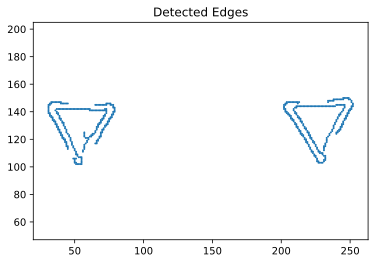

In [6]:
display.show_pts(points)
axis('equal');
title('Detected Edges');

## Use Major Axis to split particles

Theoretically, if both edges of particles has good symmetry,  The major axis will go through both centroid, so it is used to estimate the connection line. It can also be computed from covariance matrix.

The major inertia $I_m=2cma^2$, minor inertia $I_M=I_m+\dfrac{md^2}{2}$, so
$$d/2=\sqrt{\frac{I_M-I_m}{2m}}$$

Based on the major axis $\hat n$ and centroids of the whole $O$, we can split them into two particles by criteria $$\mathrm{sgn}\left[(\vec r_i-\vec r_O)\cdot \hat n\right]$$

When two particles are too close, it may fail. 

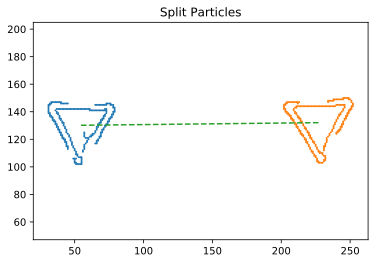

In [7]:
display.show_split(points)
display.show_axis(points)
axis('equal');
title('Split Particles');

## Use Triangles to Fit Particles 
Triangles are used to Fit Particles. Fitting parameters are centroid position $C(x, y)$, and corner location $(\rho, \theta)$ with respect to centroid $C$. The idea is like https://link.springer.com/article/10.1007%2FBF00939613 but in another way: the distance is weighted by $r$ of the point.

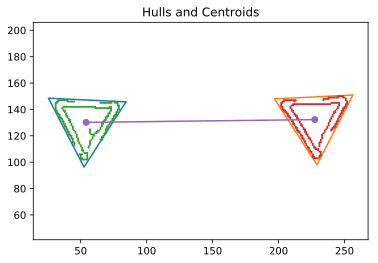

In [10]:
display.show_frame(points, 1.2)
axis('equal');
title('Hulls and Centroids');